In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
path = 'drive/MyDrive/birdsanimals/train'
classes = os.listdir(path)
print(classes)

['tiger', 'peacock']


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

base_dir = 'drive/MyDrive/birdsanimals'

train_datagen = image_dataset_from_directory(base_dir,
image_size=(200,200),
subset='training',
seed = 1,
validation_split=0.1,
       batch_size= 32)

test_datagen = image_dataset_from_directory(base_dir,
image_size=(200,200),
subset='validation',
seed = 1,
validation_split=0.1,
batch_size= 32)


Found 16 files belonging to 2 classes.
Using 15 files for training.
Found 16 files belonging to 2 classes.
Using 1 files for validation.


In [ ]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D


model = tf.keras.models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
layers.MaxPooling2D(2, 2),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D(2, 2),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D(2, 2),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D(2, 2),

layers.Flatten(),
layers.Dense(512, activation='relu'),
layers.BatchNormalization(),
layers.Dense(512, activation='relu'),
layers.Dropout(0.1),
layers.BatchNormalization(),
layers.Dense(512, activation='relu'),
layers.Dropout(0.2),
layers.BatchNormalization(),
layers.Dense(1, activation='sigmoid') #output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D


model = tf.keras.models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
layers.MaxPooling2D(2, 2),


layers.Flatten(),
layers.Dense(512, activation='relu'),

layers.Dense(1, activation='sigmoid') #output layer
])



keras.utils.plot_model(
model,
show_shapes=True,
show_dtype=True,
show_layer_activations=True
)

model.compile(
loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

history = model.fit(train_datagen,
epochs=10,
validation_data=test_datagen)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6667 - loss: 25.4030 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 35607.8477 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3333 - loss: 11506.7197 - val_accuracy: 0.0000e+00 - val_loss: 11892.5723
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 3127.5105 - val_accuracy: 0.0000e+00 - val_loss: 13126.6660
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6667 - loss: 3658.3438 - val_accuracy: 0.0000e+00 - val_loss: 12165.4746
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.6667 - loss: 3282.7766 - val_accuracy: 0.0000e+00 - val_loss: 9938.6787
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 2554.2527 - val_accuracy: 0.0000e+00 - val_loss: 7036.4375
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6667 - loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.95259076]]


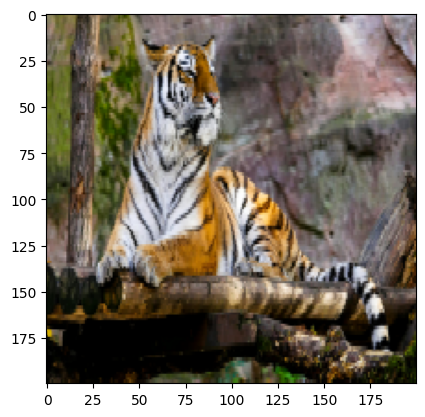

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

test_image= image.load_img("drive/MyDrive/birdsanimals/test/tiger/tt1.png",target_size=(200,200))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.9873774]]


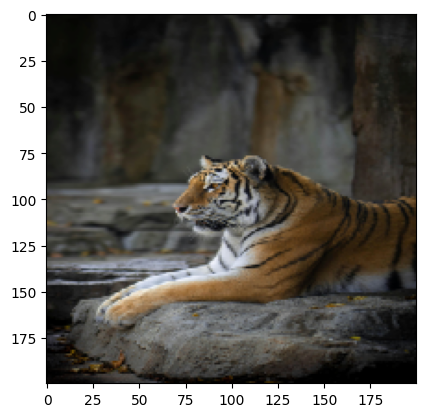

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

test_image= image.load_img("drive/MyDrive/birdsanimals/test/tiger/tt2.png",target_size=(200,200))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.9965967]]


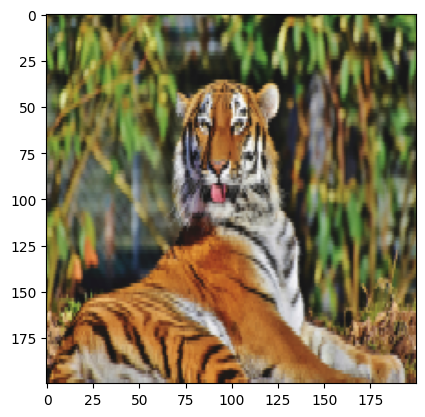

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

test_image= image.load_img("drive/MyDrive/birdsanimals/test/tiger/tt3.png",target_size=(200,200))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.5816817]]


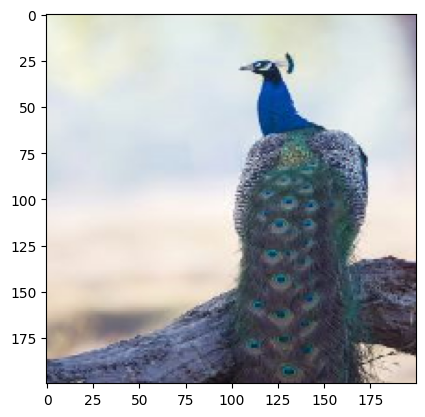

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

test_image= image.load_img("drive/MyDrive/birdsanimals/test/peacock/pt1.png",target_size=(200,200))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.9869405]]


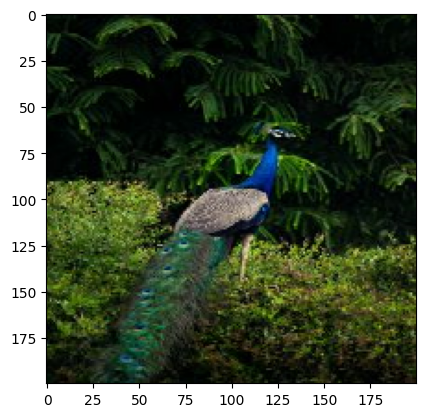

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

test_image= image.load_img("drive/MyDrive/birdsanimals/test/peacock/pt2.png",target_size=(200,200))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.82800883]]


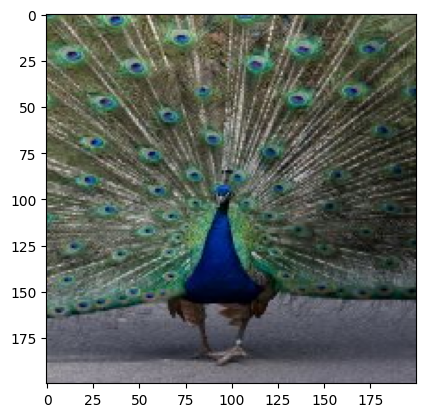

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

test_image= image.load_img("drive/MyDrive/birdsanimals/test/peacock/pt3.png",target_size=(200,200))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)

In [ ]:
if(result==1):
  print("tiger")
else:
  print("peacock")

peacock
